In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('final_dataset.csv')

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [4]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

In [5]:
# CSV 파일을 읽어들입니다.
df = pd.read_csv('semi_dataset.csv')

# 특성과 레이블을 분리합니다.
X = df.drop('label', axis=1).values  # 특성 데이터
y = df['label'].values  # 레이블 데이터


# 훈련 세트와 나머지(검증+테스트) 세트로 분할합니다. (80% : 20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

X_train = scaler.fit_transform(X_train)
X_temp = scaler.transform(X_temp)

# X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
# X_temp = X_temp.reshape((X_temp.shape[0], 1, X_temp.shape[1]))

# 나머지 데이터를 검증 세트와 테스트 세트로 분할합니다. (50% : 50%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

# 분할된 데이터 세트의 크기를 출력합니다.
print(f"Train set: {X_train.shape[0]} samples")
print(f"Validation set: {X_val.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

# 분할된 데이터 세트의 레이블 분포를 출력합니다.
print(f"Train set label distribution: {np.bincount(y_train.astype(int))}")
print(f"Validation set label distribution: {np.bincount(y_val.astype(int))}")
print(f"Test set label distribution: {np.bincount(y_test.astype(int))}")

Train set: 1714 samples
Validation set: 214 samples
Test set: 215 samples
Train set label distribution: [855 859]
Validation set label distribution: [107 107]
Test set label distribution: [107 108]


In [6]:
X_train.shape

(1714, 248)

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import seaborn as sns
from pycaret.classification import *

In [8]:
# # PyCaret 설정
# # train_size를 0.8로 설정하여 학습 데이터와 테스트 데이터를 80:20으로 분할
# exp_clf = setup(data = df, target = 'label', session_id=123, train_size=0.8)

# # 모든 분류 모델을 AUC 기준으로 비교
# best_model = compare_models(sort = 'Accuracy')

# # 가장 성능이 좋은 모델을 출력합니다.
# print(best_model)

In [9]:
# # PyCaret 설정
# exp_clf = setup(data = df, target = 'label', session_id=123)

# # CatBoost 모델 생성
# cat_model = create_model('catboost', fold = 5)

# # 모델 학습
# cat_tuned = tune_model(cat_model, optimize = 'Accuracy')

# # 검증 세트를 이용한 예측
# predictions = predict_model(cat_tuned)

# # 모델의 성능 평가
# evaluate_model(cat_tuned)

Validation Accuracy (KNN): 0.7150
Test Accuracy (KNN): 0.7535

Classification Report (Test set - KNN):
              precision    recall  f1-score   support

           0       0.97      0.52      0.68       107
           1       0.68      0.98      0.80       108

    accuracy                           0.75       215
   macro avg       0.82      0.75      0.74       215
weighted avg       0.82      0.75      0.74       215



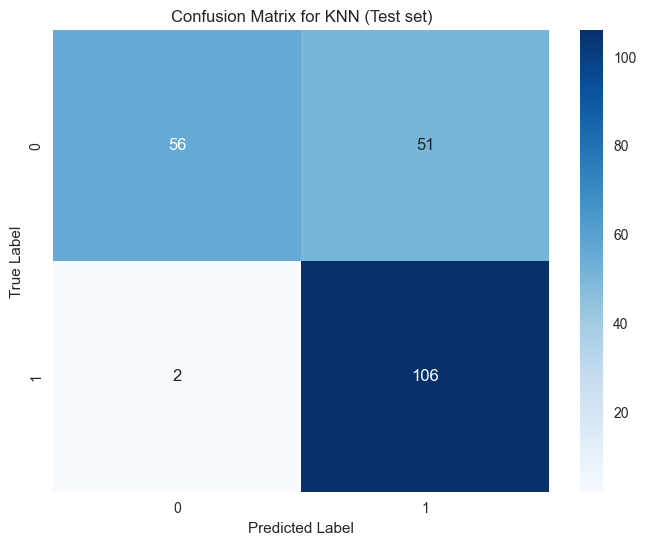

In [74]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create an instance of the KNN Classifier
knn_classifier = KNeighborsClassifier(n_neighbors=3)  # You can adjust the number of neighbors as needed

# Train the KNN model on the training data
knn_classifier.fit(X_train, y_train)

# Validation set evaluation
y_pred_val_knn = knn_classifier.predict(X_val)
accuracy_val_knn = accuracy_score(y_val, y_pred_val_knn)
print(f"Validation Accuracy (KNN): {accuracy_val_knn:.4f}")

# Test set evaluation
y_pred_test_knn = knn_classifier.predict(X_test)
accuracy_test_knn = accuracy_score(y_test, y_pred_test_knn)
print(f"Test Accuracy (KNN): {accuracy_test_knn:.4f}")

# Classification report and confusion matrix for test set
class_report_test_knn = classification_report(y_test, y_pred_test_knn)
print("\nClassification Report (Test set - KNN):")
print(class_report_test_knn)

conf_matrix_test_knn = confusion_matrix(y_test, y_pred_test_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test_knn, annot=True, fmt='d', cmap="Blues")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for KNN (Test set)')
plt.show()


In [75]:
# 훈련 세트에 대한 예측을 수행합니다.
y_train_pred = knn_classifier.predict(X_train)

# 훈련 세트의 정확도를 계산하고 출력합니다.
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy:.4f}")

# 검증 세트를 이용해 예측을 수행합니다.
y_pred = knn_classifier.predict(X_val)

# 검증 세트의 정확도를 계산하고 출력합니다.
val_accuracy = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy: {val_accuracy:.4f}")

# 과적합 확인
if train_accuracy > val_accuracy:
    print('The model is overfitting.')
else:
    print('The model is not overfitting.')

Training Accuracy: 0.7882
Validation Accuracy: 0.7150
The model is overfitting.


### **PyAudio Setup**

In [76]:
import pyaudio

In [77]:
FORMAT = pyaudio.paInt16
CHANNELS = 1
SAMPLE_RATE = 16000
CHUNK = int(SAMPLE_RATE / 10)

audio = pyaudio.PyAudio()

In [78]:
def int2float(sound):
    abs_max = np.abs(sound).max()
    sound = sound.astype('float32')
    if abs_max > 0:
        sound *= 1/32768
    sound = sound.squeeze()  # depends on the use case
    return sound

In [79]:
import librosa

continue_recording = True

# def stop():
#     input("Press Enter to stop the recording:")
#     global continue_recording
#     continue_recording = False

def start_recording():

    stream = audio.open(format=FORMAT,
                    channels=CHANNELS,
                    rate=SAMPLE_RATE,
                    input=True,
                    frames_per_buffer=CHUNK)

    data = []
    
    global continue_recording
    continue_recording = True

    while continue_recording:
    
        audio_chunk = stream.read(CHUNK)
        data.append(audio_chunk)

        # audio_int16 = np.frombuffer(audio_chunk, np.int16)
        # audio_float32 = int2float(audio_int16)

        # Convert the audio to a suitable format for YAMnet
        waveform = np.frombuffer(audio_chunk, dtype=np.int16) / 32768.0
        waveform = waveform.astype(np.float32)
        
        # Extract Log Mel Spectrogram features
        spectrogram_features_list = []
        predictions = []

        n_fft_value = min(2048, len(waveform))

        spectrogram_features = librosa.feature.melspectrogram(y=waveform, sr=SAMPLE_RATE, n_fft=n_fft_value, n_mels=248)
        spectrogram_features = librosa.power_to_db(spectrogram_features, ref=np.max)
        spectrogram_features_list.append(spectrogram_features)
        spectrogram_aggregated = np.mean(spectrogram_features, axis=1).reshape(1, -1) 

        # Ensure the feature count is correct
        if spectrogram_aggregated.shape[1] != scaler.n_features_in_:
            raise ValueError(f"Incorrect number of features. Expected {scaler.n_features_in_}, got {spectrogram_aggregated.shape[1]}")

        # Scale features
        spectrogram_scaled = scaler.transform(spectrogram_aggregated)

        # Inside your loop, after SVC prediction
        fall_detection_prediction = knn_classifier.predict(spectrogram_scaled)
        predictions.append(fall_detection_prediction)

        if fall_detection_prediction == 1:
            print("Fall Detected")
            break

In [81]:
start_recording()

Fall Detected
